## Importing and logging to the Twitter API

In [51]:
# Import the libraries
import tweepy
import configparser
import pandas as pd
import scipy 
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import json
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
%matplotlib inline

In [52]:
from utils import keys_definition, get_tweets, CleanTweets,tweets_toframe, sentimentAnalysis\
    , sentimentToDf, generate_stopwords, showReport, createWordCloud, getPolarity, getSubjetivity\
    , sent_polarity

### Get More than 100 tweets with paginator

In [53]:
tweets= get_tweets('The Watcher',language='en',num_tweets=1000)
df=tweets_toframe(tweets)
res=sentimentAnalysis(df)

In [54]:
# keyword

In [55]:
df_sent = sentimentToDf(df,res)
df_sent.head()

,id,text,clean_tweet,created_at,source,retweets,replies,likes,quote_count,scores,sentiment,stars
0,1581419316763054080,If anyone is planning on watching “the watcher...,If anyone is planning on watching the watcher ...,2022-10-15 22:58:41+00:00,Twitter for iPhone,0,0,0,0,0.716056,negative,1
1,1581419272009842690,Naomi Watts relates to her character in The Wa...,Naomi Watts relates to her character in The Wa...,2022-10-15 22:58:30+00:00,WordPress.com,0,0,0,0,0.433896,positive,4
2,1581419210571665408,The watcher is so intenseeee,The watcher is so intenseeee,2022-10-15 22:58:15+00:00,Twitter for iPhone,0,0,0,0,0.407963,negative,2
3,1581419090018959360,y’all gotta watch “THE WATCHER” on Netflix 😮‍💨🫣,y all gotta watch THE WATCHER on Netflix,2022-10-15 22:57:47+00:00,Twitter for iPhone,0,0,0,0,0.518193,positive,5
4,1581419007256981504,The Watcher needs to come and kill Ellie. Wtf,The Watcher needs to come and kill Ellie Wtf,2022-10-15 22:57:27+00:00,Twitter for iPhone,0,0,0,0,0.263011,positive,5


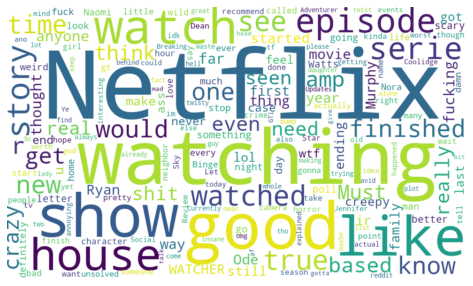

<module 'matplotlib.pyplot' from 'c:\\Users\\javii\\anaconda3\\envs\\ML_Social\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [56]:
createWordCloud(df, 'clean_tweet')

* the tweets show that the sentiment around "The Watcher" is mainly positive
* this is how the overall sentiment and stars ratings breakdown on the 1000 total records we recovered : 
stars
1    314
2     62
3    137
4    126
5    361
Name: id, dtype: int64


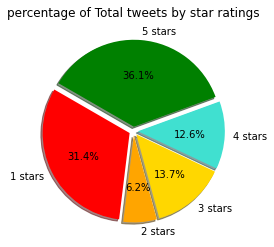

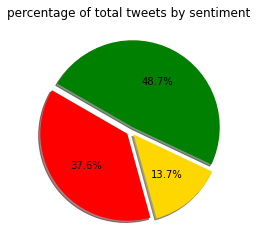

In [76]:
showReport(df_sent)


In [59]:
print('The five more positive tweets')
print(df_sent[df_sent['stars']==5].nlargest(5,'scores')['text'].tolist())
print('\n ************************************************************************************************************')
print('The five more negative tweets')
print(df_sent[df_sent['stars']==1].nlargest(5,'scores')['text'].tolist())

The five more positive tweets
['@vhic_tore great acting really great everything  i love it even my scary cat husband watched THE WATCHER', 'The Watcher on Netflix.. 10/10', 'The Watcher on Netflix 10/10', 'The watcher on Netflix 10/10', 'The watcher so far 10/10']

 ************************************************************************************************************
The five more negative tweets
['the watcher is the most useless show i’ve ever watched WHY WOULD NETFLIX MAKE A SHOW OF A CASE THAT HASNT BEEN SOLVED', 'I hope all the A-list actors on the @netflix series The Watcher were paid a shit load of money b/c this is the worst piece of garbage currently airing. Many scenes must have required multiple takes - the director probably couldn’t stop the actors from laughing.', 'This Ellie from The Watcher is MAD! \nShe’s so stupid', 'the watcher is fucking TERRIBLE horrible ending', 'The Watcher on Netflix , should be called the sleeper, it is by far the worst series ever, nobody 